<a href="https://colab.research.google.com/github/KaylumCassidy/SCMCA2/blob/main/ESG_Risk_Analysis_Insights_from_S%26P_500_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESG Risk Analysis

The Imperative of ESG Risk Analysis
In an era defined by heightened stakeholder consciousness, ESG risk analysis underscores the importance of aligning business practices with sustainability goals. Beyond financial metrics, this approach captures the multifaceted dimensions of a company's operations. ESG factors extend far beyond profits, influencing investors, consumers, regulators, and even shaping a company's reputation. As such, ESG risk analysis is not merely a peripheral consideration, but a cornerstone in crafting resilient, ethical, and forward-looking strategie

## Libraries import

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [2]:
data = pd.read_csv('SCM_SP.csv')
print(f"Shape of the dataset: {data.shape}")
data.head()

Shape of the dataset: (503, 14)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000",15,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500",29,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000",12,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000",17,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000",28,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [3]:
data.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,503.000000,503.000000,503.000000,503.000000,433.000000
mean,18.441352,4.888668,5.745129,7.786282,1.896074
std,10.025070,5.330130,3.084741,4.726238,0.940748
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.700000,4.600000,4.800000,1.000000
50%,19.000000,3.000000,5.800000,8.000000,2.000000
75%,25.000000,8.000000,7.400000,11.000000,2.000000
max,46.000000,25.000000,15.500000,21.000000,5.000000


### Sector-wise ESG Risk Analysis

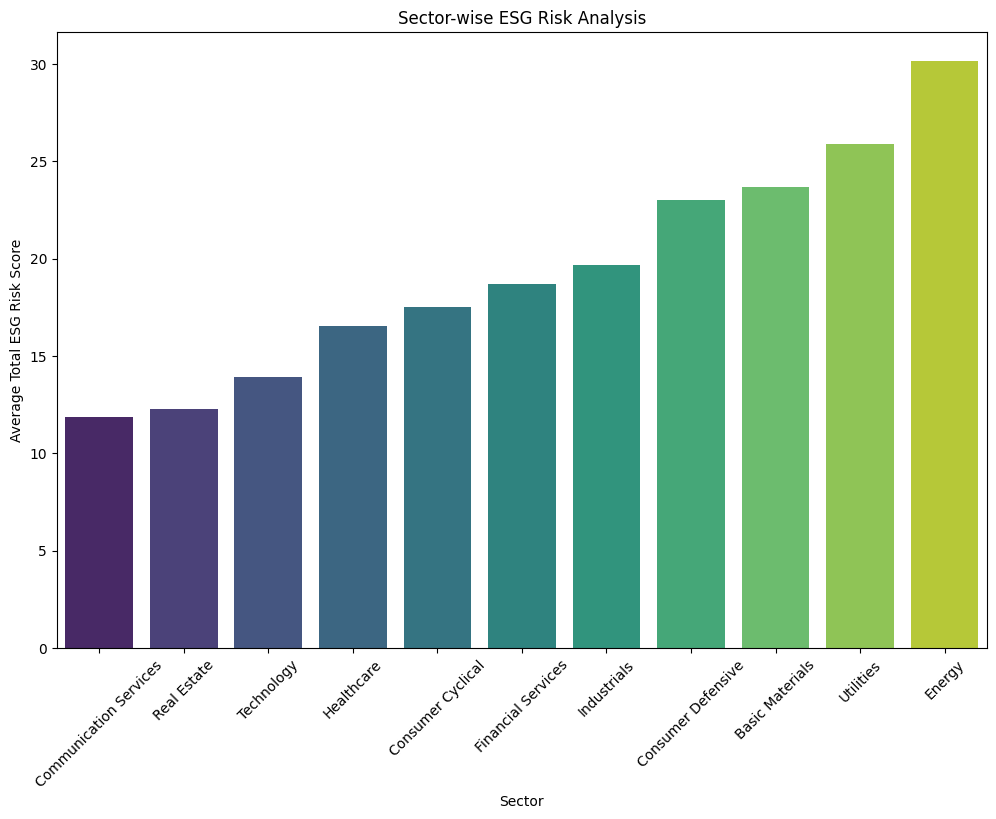

In [4]:
# Group the data by 'Sector' and calculate the mean for 'Total ESG Risk score'
sector_wise_risk = data.groupby('Sector')['Total ESG Risk score'].mean().sort_values()

# Create a bar plot for the sector-wise average ESG risk scores
plt.figure(figsize=(12, 8))
sns.barplot(x=sector_wise_risk.index, y=sector_wise_risk.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Sector-wise ESG Risk Analysis')
plt.xlabel('Sector')
plt.ylabel('Average Total ESG Risk Score')
plt.show()

### Top Performers by ESG Risk Level

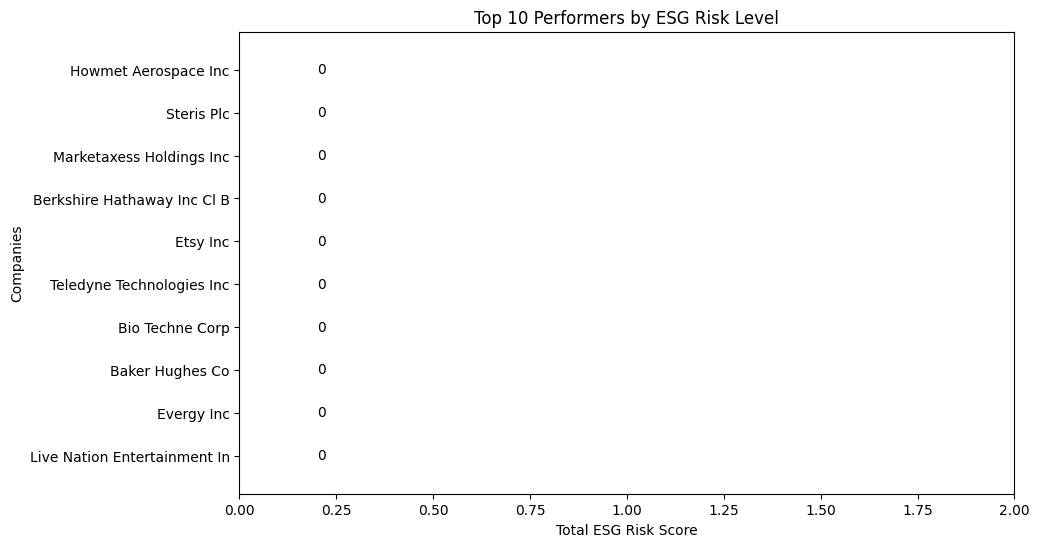

In [6]:
# Sort the data by 'Total ESG Risk score' in ascending order to get companies with the lowest ESG risk
top_performers = data.sort_values(by='Total ESG Risk score').head(10)

top_performers = top_performers.sort_values(by='Total ESG Risk score')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_performers['Name'], top_performers['Total ESG Risk score'], color='green')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Companies')
plt.title('Top 10 Performers by ESG Risk Level')
plt.xlim(0, top_performers['Total ESG Risk score'].max() + 2)  # +2 for better readability
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Add annotations
for i, v in enumerate(top_performers['Total ESG Risk score']):
    plt.text(v + 0.2, i, str(v), color='black', verticalalignment='center')

# Show the plot
plt.show()

## Percentile Analysis